In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [81]:
train_df = pd.read_csv('./data/train.csv')

test_df = pd.read_csv('./data/test.csv')


In [82]:
def hot_encode_columns(original_df, columns):
    original_df = original_df.copy()
    
    print([*columns])
    encoded_df = pd.get_dummies(original_df.loc[:, columns])

    original_df = original_df.drop([*columns] , axis = 1) 
    return pd.concat([original_df,encoded_df], axis=1)
    

In [83]:
train_df = hot_encode_columns(train_df, ['Sex', 'Embarked'])

test_df = hot_encode_columns(test_df, ['Sex', 'Embarked'])

['Sex', 'Embarked']
['Sex', 'Embarked']


In [84]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Sex_female   891 non-null    bool   
 11  Sex_male     891 non-null    bool   
 12  Embarked_C   891 non-null    bool   
 13  Embarked_Q   891 non-null    bool   
 14  Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(2), int64(5), object(3)
memory usage: 74.1+ KB


In [86]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


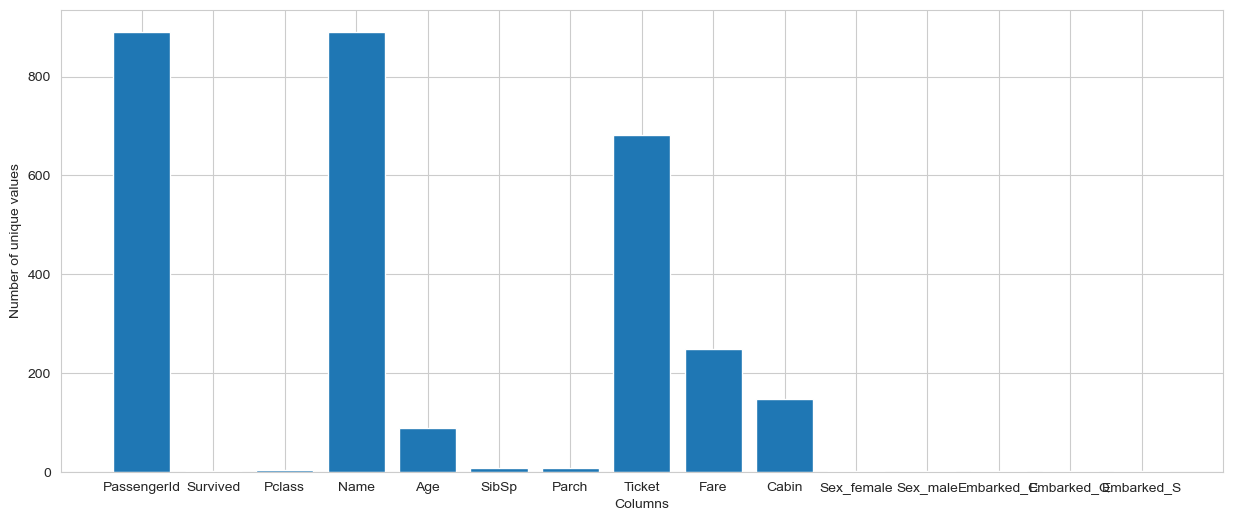

In [87]:
### Plot every column diversity in dataset

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(train_df.columns, train_df.nunique())
ax.set_xlabel('Columns')
ax.set_ylabel('Number of unique values')

plt.show()

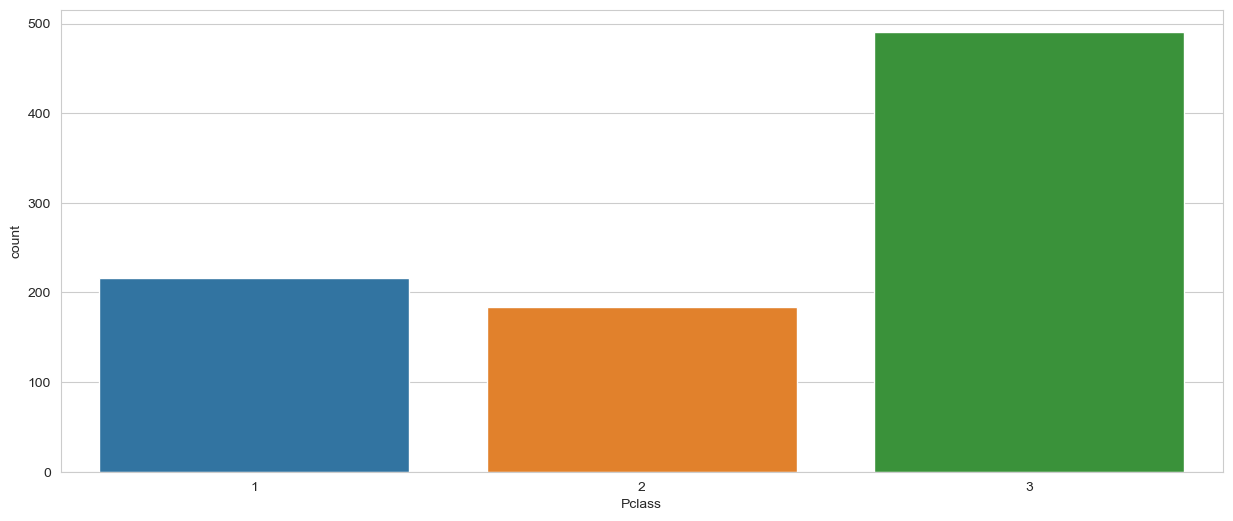

In [88]:
### Pclass distribution

fig, ax = plt.subplots(figsize=(15, 6))


sns.countplot(x='Pclass', data=train_df, ax=ax)

plt.show()




C:\Users\kacsa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


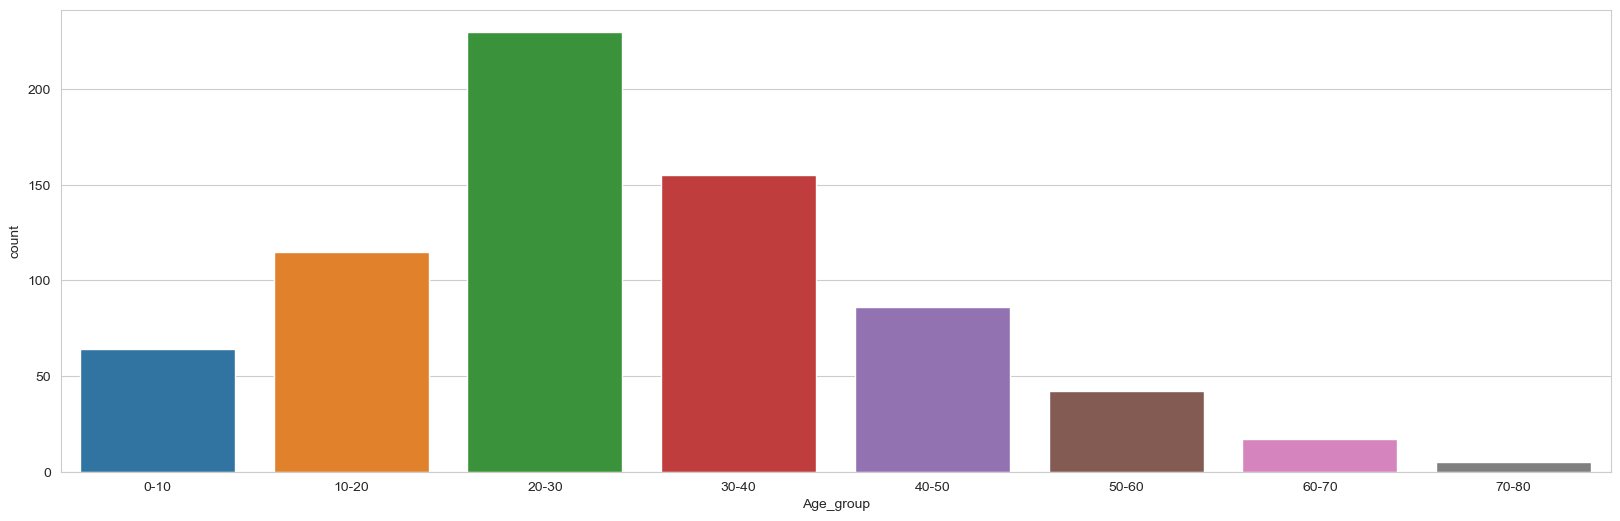

In [89]:
## Sex distribution


fig, ax = plt.subplots(figsize=(20, 6))


copied_df = train_df.copy()



copied_df['Age_group'] = pd.cut(copied_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
sns.countplot(x='Age_group', data=copied_df, ax=ax)

plt.show()

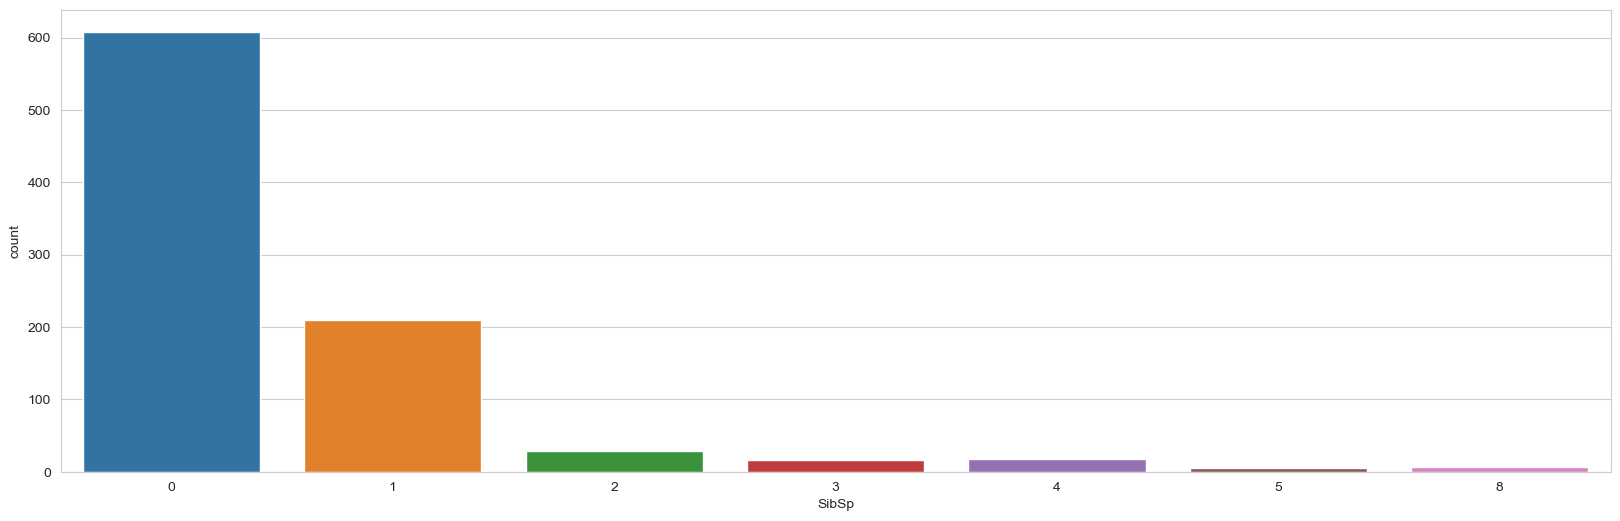

In [90]:
### Plot Siblings and Spouses distribution


fig, ax = plt.subplots(figsize=(20, 6))


sns.countplot(x='SibSp', data=train_df, ax=ax)


plt.show()

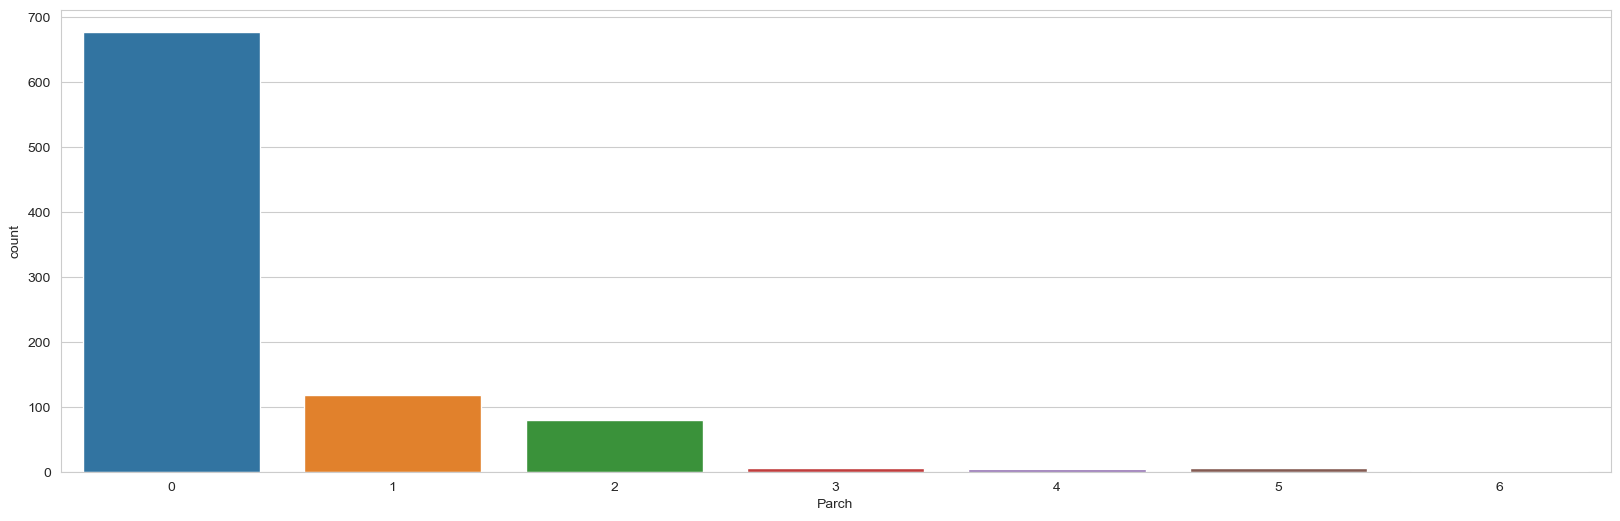

In [91]:
### Plot Parents and Children distribution


fig, ax = plt.subplots(figsize=(20, 6))


sns.countplot(x='Parch', data=train_df, ax=ax)


plt.show()



C:\Users\kacsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

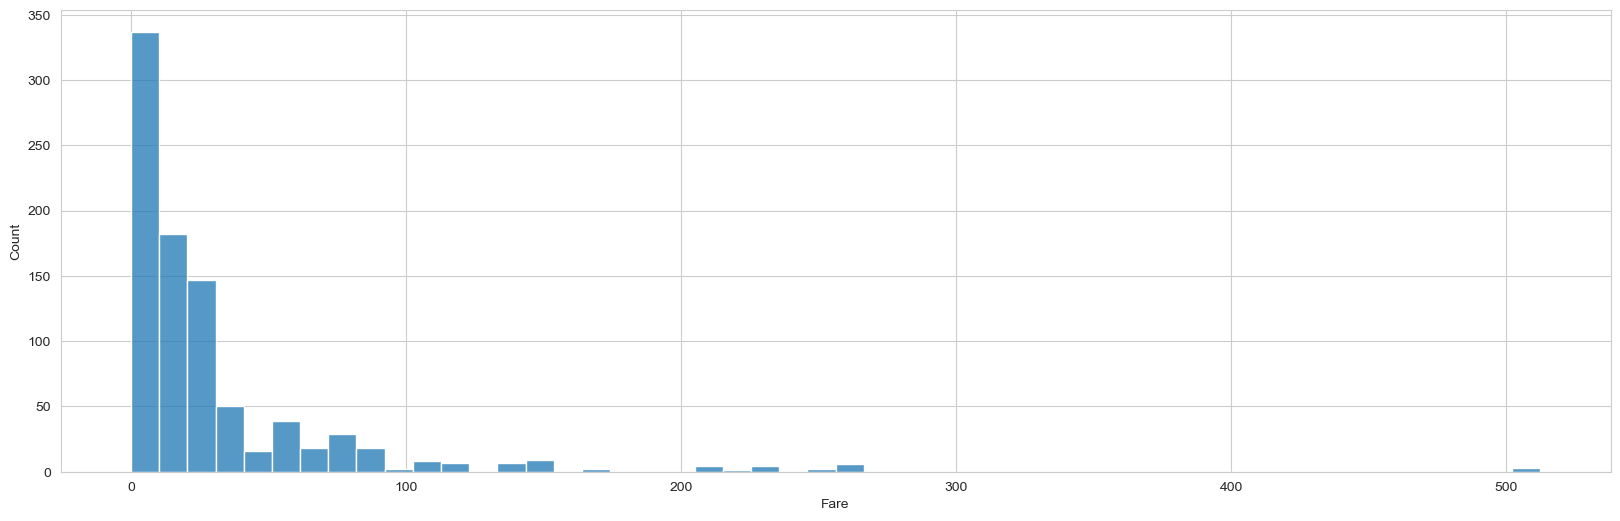

In [92]:
### Plot Fare distribution


fig, ax = plt.subplots(figsize=(20, 6))


sns.histplot(x='Fare', data=train_df, ax=ax, bins=50)

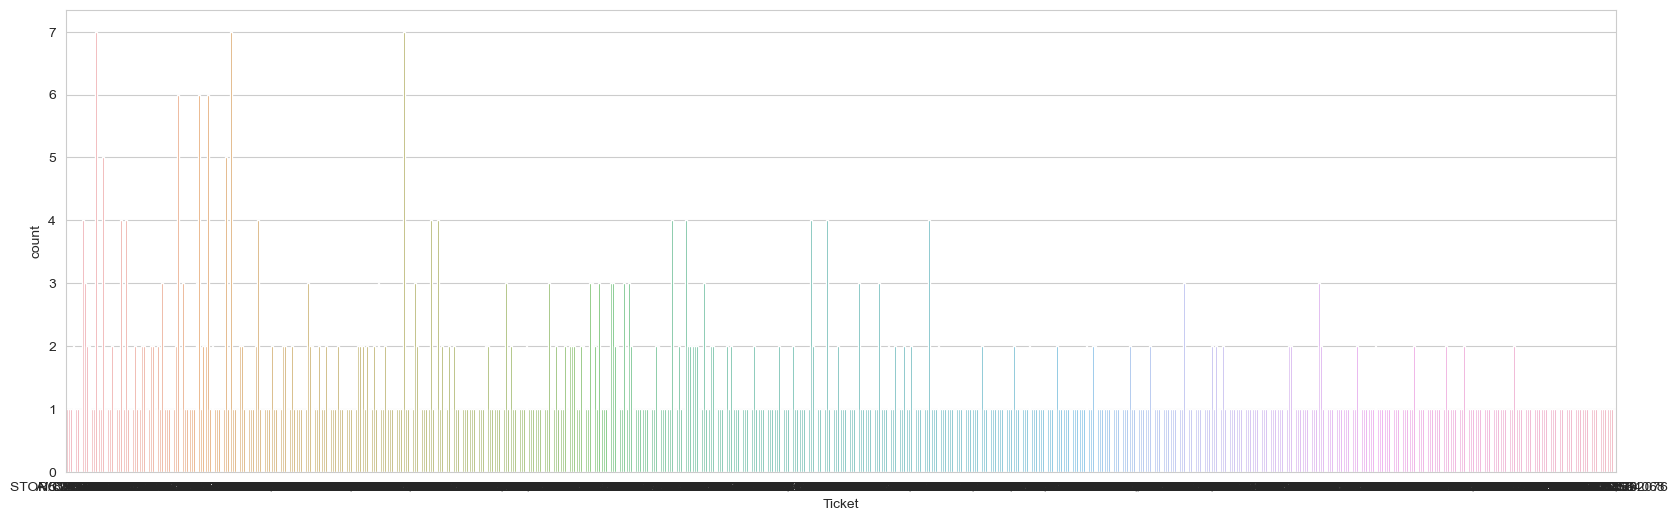

In [93]:
# Ticket distribution

fig, ax = plt.subplots(figsize=(20, 6))



sns.countplot(x='Ticket', data=train_df, ax=ax)


plt.show()



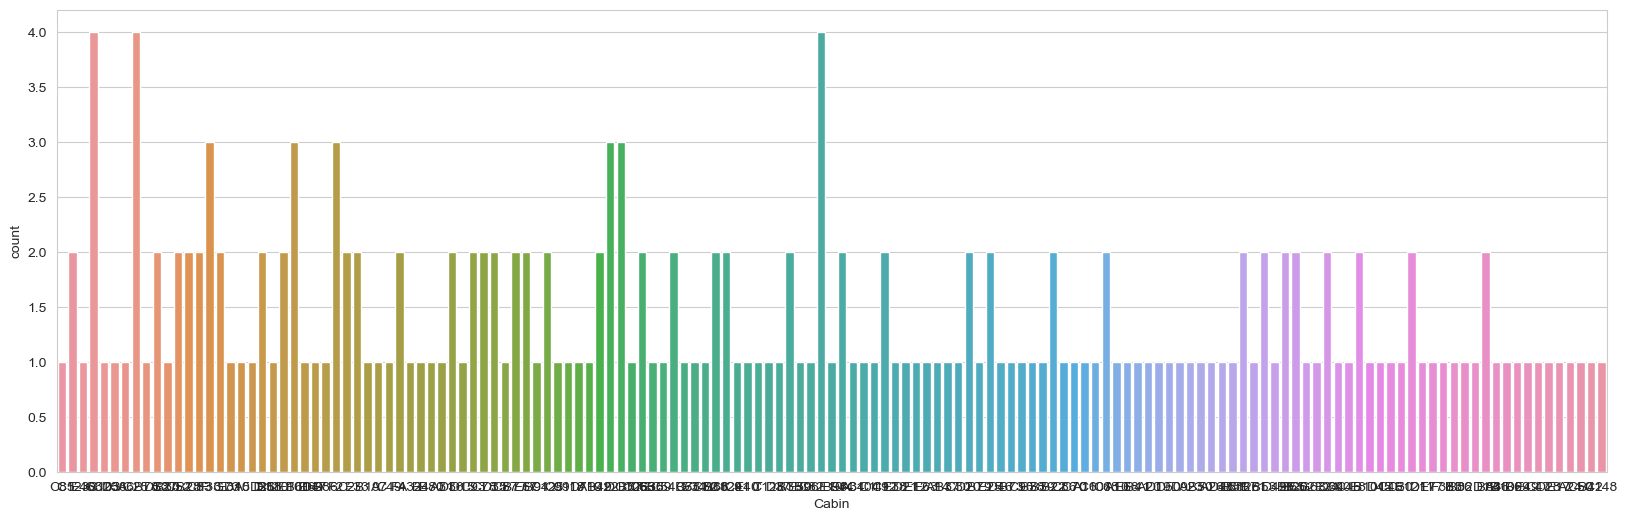

In [94]:
### Cabin distribution


fig, ax = plt.subplots(figsize=(20, 6))


sns.countplot(x='Cabin', data=train_df, ax=ax)



plt.show()


In [95]:
### Given the fact that some distributions are quite skewed, they do not convey that much information. Therefore, I will drop the following columns: Ticket, Cabin, Name, Sibsp, Parch


train_df = train_df.drop(['Ticket', 'Cabin', 'Name', 'SibSp', 'Parch'], axis=1)

test_df = test_df.drop(['Ticket', 'Cabin', 'Name', 'SibSp', 'Parch'], axis=1)


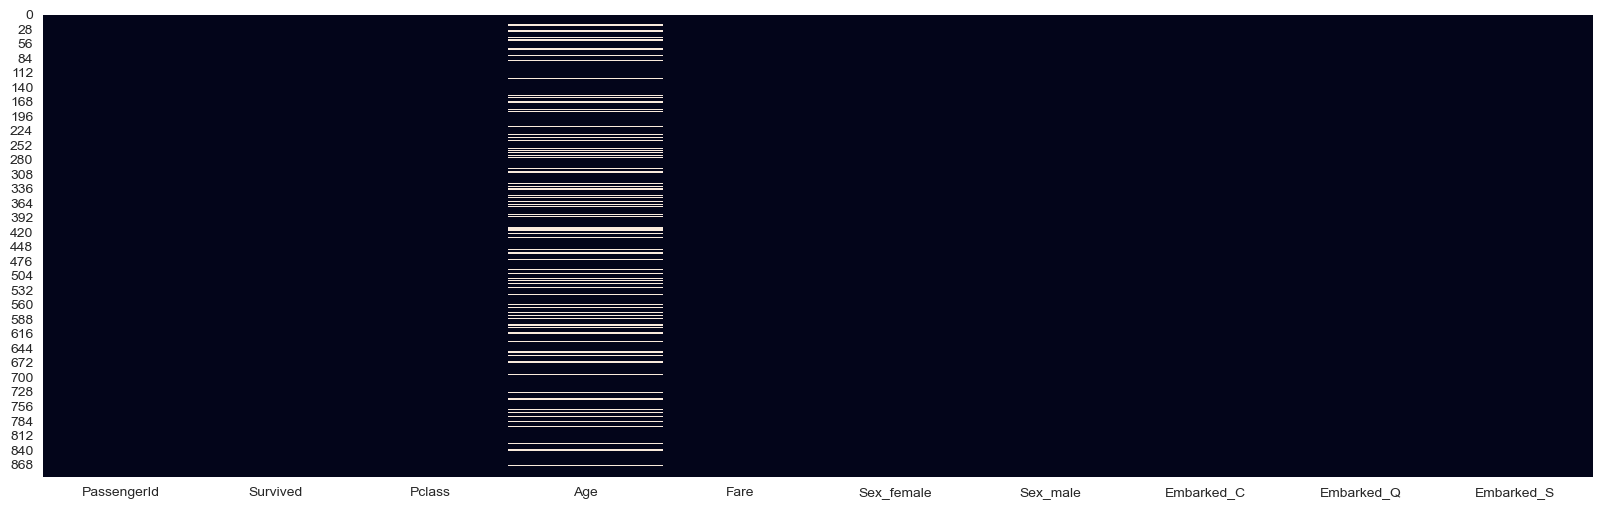

In [96]:
## Show missing values


fig, ax = plt.subplots(figsize=(20, 6))


sns.heatmap(train_df.isnull(), cbar=False, ax=ax)


plt.show()

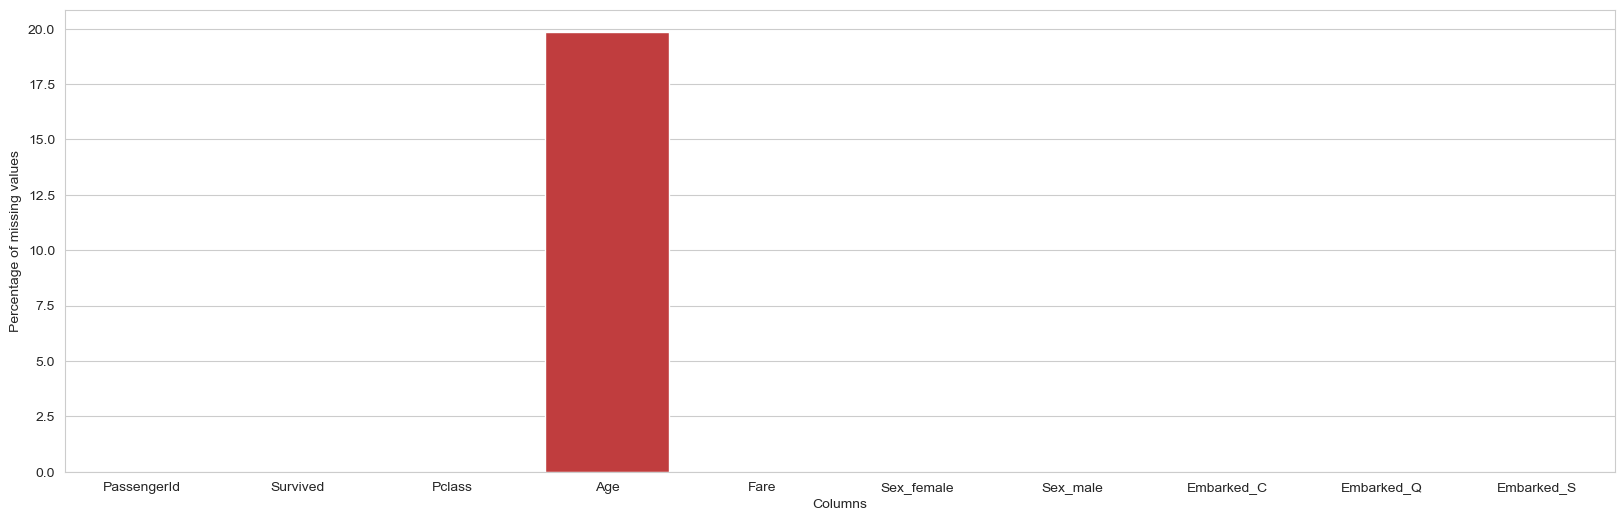

In [97]:
## Show percentage of missing values in columns


fig, ax = plt.subplots(figsize=(20, 6))


missing_values = train_df.isnull().sum() / train_df.shape[0] * 100


sns.barplot(x=missing_values.index, y=missing_values, ax=ax)

plt.ylabel('Percentage of missing values')

plt.xlabel('Columns')

plt.show()



In [98]:
## In this submission I will fill  the columns with missing values using the median


train_df = train_df.fillna(train_df.median())

test_df = test_df.fillna(test_df.median())




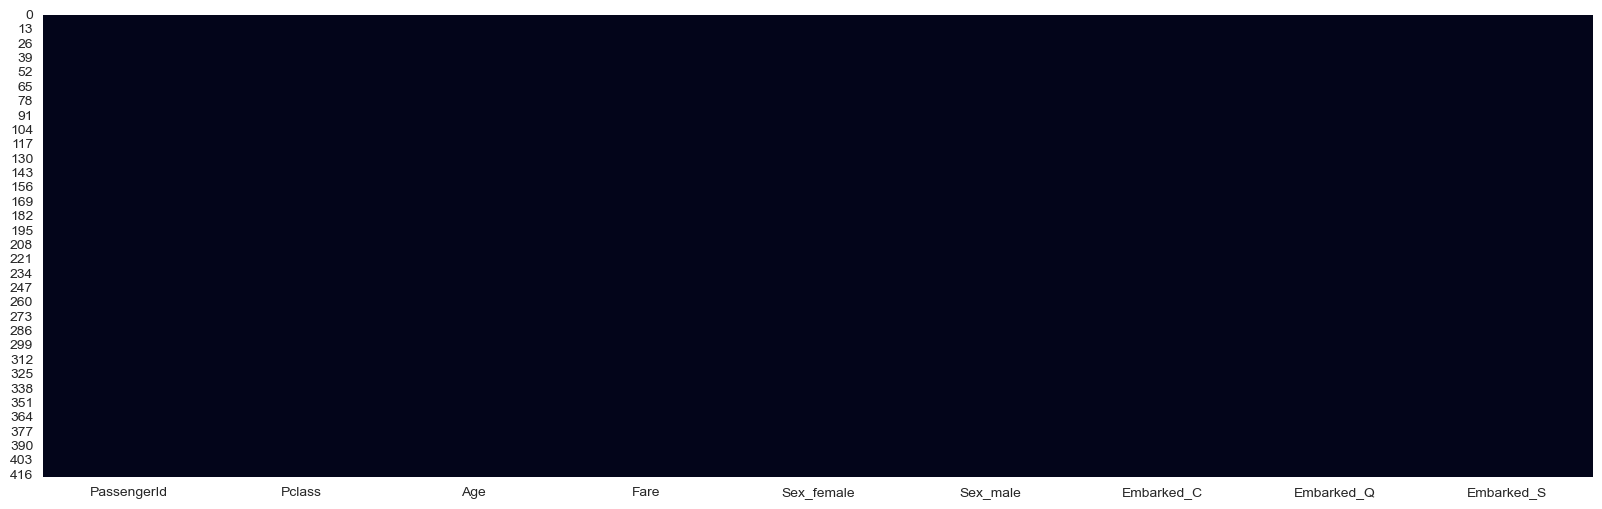

In [99]:
## Show missing values in test_df


fig, ax = plt.subplots(figsize=(20, 6))


sns.heatmap(test_df.isnull(), cbar=False, ax=ax)


plt.show()


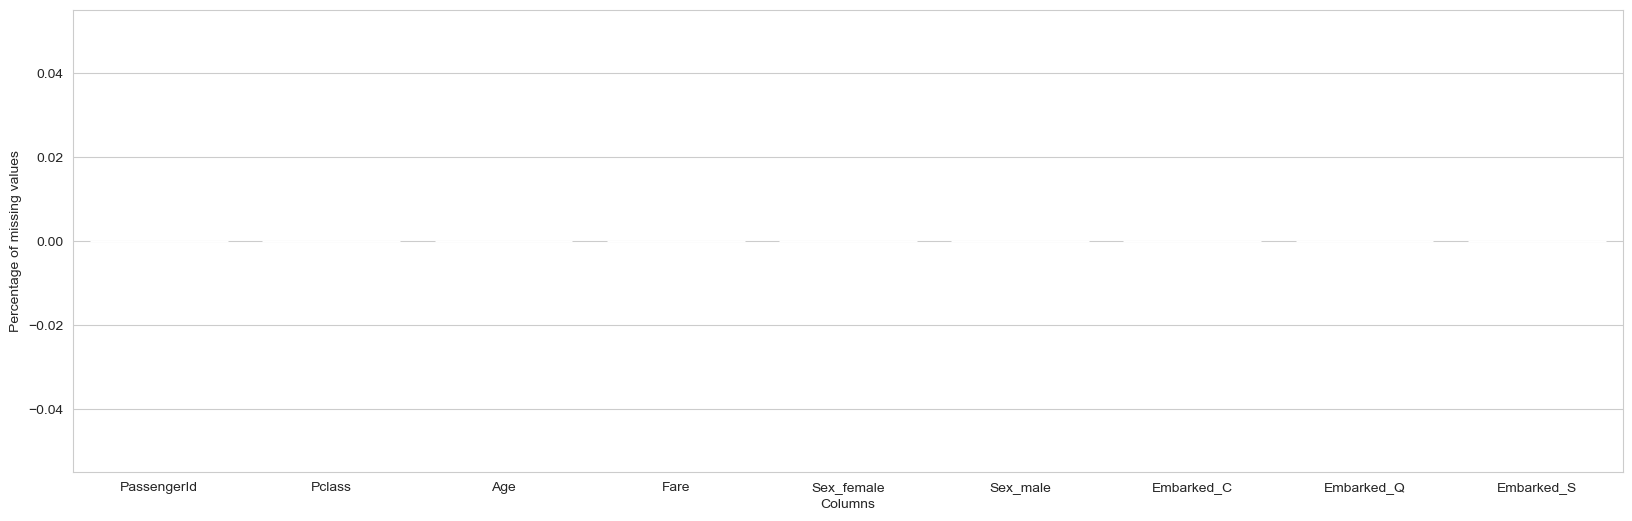

In [100]:
## Show percentage of missing values in columns in test_df


fig, ax = plt.subplots(figsize=(20, 6))


missing_values = test_df.isnull().sum() / test_df.shape[0] * 100


sns.barplot(x=missing_values.index, y=missing_values, ax=ax)


plt.ylabel('Percentage of missing values')

plt.xlabel('Columns')


plt.show()



In [101]:
X_train = train_df.drop('Survived', axis=1)

y_train = train_df['Survived']

In [102]:
## Let's start with XGBoost


from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = XGBClassifier()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)



In [103]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')



Accuracy: 0.7932960893854749


In [104]:
### Save submissions

submissions_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': model.predict(test_df)})

In [105]:
submissions_df.to_csv('./submissions/submission_1.csv', index=False)